# <font color='blue'> Week - 4: Will you quit? </font>
*Provided by:*
![ENSTABrain](images/LogoEB.png)

# <font color='blue'>Agenda</font>

- We'll compete as teams against each other to see who makes a better model
- Revise what we have seen in previous weeks 
- Learn about Feature importance

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
%matplotlib inline

In [2]:
data=pd.read_csv('data/HR_Analysis.csv')
data.head(5)


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


## <font color='blue'>Introduction</font>
** Employees that aren't happy tend to leave their jobs for better ones.This phenomenon is called Employee Attrition. Companies know this very well. That's why they always try to keep their employees satisfied. Workers leaving could mean paying more money to employ others and also loss of high skilled workers. 
Our goal today is to create a predictive model to see if we can predict employee attrition on this synthetically generated IBM dataset.**

## <font color='blue'>What you should do :</font>
** 1 - Exploratory Data Analysis and Visualization**

**2- Feature Engineering (if possible)**

**3- Create and Optimize your model **

## <font color='blue'>Let's understand our Data :</font>
* As we can see, our label here is the column Attrition. We should also notice that we have a mix of categorical and numerical data. That's why we'll need to numerically encode the categorical Data. *

In [3]:
# We need to check whether we have NaN's in our data
data.isnull().any()

Age                         False
Attrition                   False
BusinessTravel              False
DailyRate                   False
Department                  False
DistanceFromHome            False
Education                   False
EducationField              False
EmployeeCount               False
EmployeeNumber              False
EnvironmentSatisfaction     False
Gender                      False
HourlyRate                  False
JobInvolvement              False
JobLevel                    False
JobRole                     False
JobSatisfaction             False
MaritalStatus               False
MonthlyIncome               False
MonthlyRate                 False
NumCompaniesWorked          False
Over18                      False
OverTime                    False
PercentSalaryHike           False
PerformanceRating           False
RelationshipSatisfaction    False
StandardHours               False
StockOptionLevel            False
TotalWorkingYears           False
TrainingTimesL

In [4]:
# Here we see the shape of our data: 
data.shape

(1470, 35)

In [5]:
# Here we see the different datatypes available in our dataset: 
data.dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears   

## <font color='blue'>Preprocessing :</font>


In [6]:
#As usual, we need to encode our categorical data so that we can apply our model
#We'll do this 1st on our label because we'll drop it later on and because it's the easiest to encode as there are only 
#Yes and no possible values

# Define a dictionary for the target mapping
target_map = {'Yes':1, 'No':0}
# Use the pandas apply method to numerically encode our attrition target variable
target= data["Attrition"].apply(lambda x: target_map[x])

In [7]:
dataset=data.drop('Attrition',axis=1) #We'll use this variable to create our features dataframe

In [8]:
# We'll create 2 lists: One containig numerical data and the other containing categorical values. 
# This will allow us to manipulate our data easily and do our Feature Engineering

categorical=[]
#The method iteritems return the column name and the values contained in it. This method is used generally only in for loops
for col, val in dataset.iteritems():
    if val.dtype== 'object':
        categorical.append(col)
#Since we created our categorical data list, we know for a fact that the rest of the items in our data are numerical
#that's why we use the method difference

numerical=dataset.columns.difference(categorical)

In [9]:
#We'll now create a new dataframe where we'll have all our categorical features. We'll apply a new method from Pandas to encode 
#our categorical data called get_dummies 
cat_features=data[categorical]
cat_features=pd.get_dummies(cat_features)
cat_features.head()

,BusinessTravel_Non-Travel,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Human Resources,Department_Research & Development,Department_Sales,EducationField_Human Resources,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,...,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,Over18_Y,OverTime_No,OverTime_Yes
0,0,0,1,0,0,1,0,1,0,0,...,0,0,1,0,0,0,1,1,0,1
1,0,1,0,0,1,0,0,1,0,0,...,0,1,0,0,0,1,0,1,1,0
2,0,0,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,1,0,1
3,0,1,0,0,1,0,0,1,0,0,...,0,1,0,0,0,1,0,1,0,1
4,0,0,1,0,1,0,0,0,0,1,...,0,0,0,0,0,1,0,1,1,0


In [10]:
#We'll store our numerical features in a DataFrame too
num_features=data[numerical]

In [11]:
#Let's now merge our DataFrames and get all our features together
features=pd.concat([num_features,cat_features], axis=1)

In [12]:
#We also need to notice that we have quite many No values in our label. This could cause the model to be less accurate
#There are many statistical methods that we could use to fix this but we won't dive in the technicalities today
#For curious people, check "SMOTE method to deal with skewed values"
target.value_counts()

0    1233
1     237
Name: Attrition, dtype: int64

## <font color='blue'>Implementing our Model :</font>

**Having encoded our categorical values, we are now ready to build our model**

In [13]:
#First, let us split our dataset into test and train data

from sklearn.cross_validation import train_test_split
X_train,X_test,y_train,y_test=train_test_split(features, target,train_size=0.6,random_state=0)


C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [14]:
#We'll now fix our model parameters

seed = 0   # We set our random seed to zero for reproducibility
# Random Forest parameters
rf_params = {
    'n_jobs': -1,
    'n_estimators': 800,
    'warm_start': True, 
    
    'max_depth': 9,
    'min_samples_leaf': 2,
    
    'random_state' : seed,
    'verbose': 0
}

In [15]:
#We'll now import our model
from sklearn.ensemble import RandomForestClassifier



rf = RandomForestClassifier(**rf_params) #Using (**) allows us to unpack our parameters 
rf.fit(X_train,y_train) #We fit our train data to our model
rf_predictions=rf.predict(X_test) # We make predictions on the test data
print("Prediction is complete! ")

Prediction is complete! 


In [16]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,rf_predictions) #We get our predictions' score

0.87074829931972786

** At first, 87% accuracy might seem good but we have to keep in mind that our Yes and No distribution in our target is about 
84% and 26%. Our model here is being influenced by this distribution. Any random guess from someone has a chance of 84% to be No and 26% to be Yes. Our model's predictions have 87% of a chance to be accurate. So, our model is only guessing better than a random guess**  

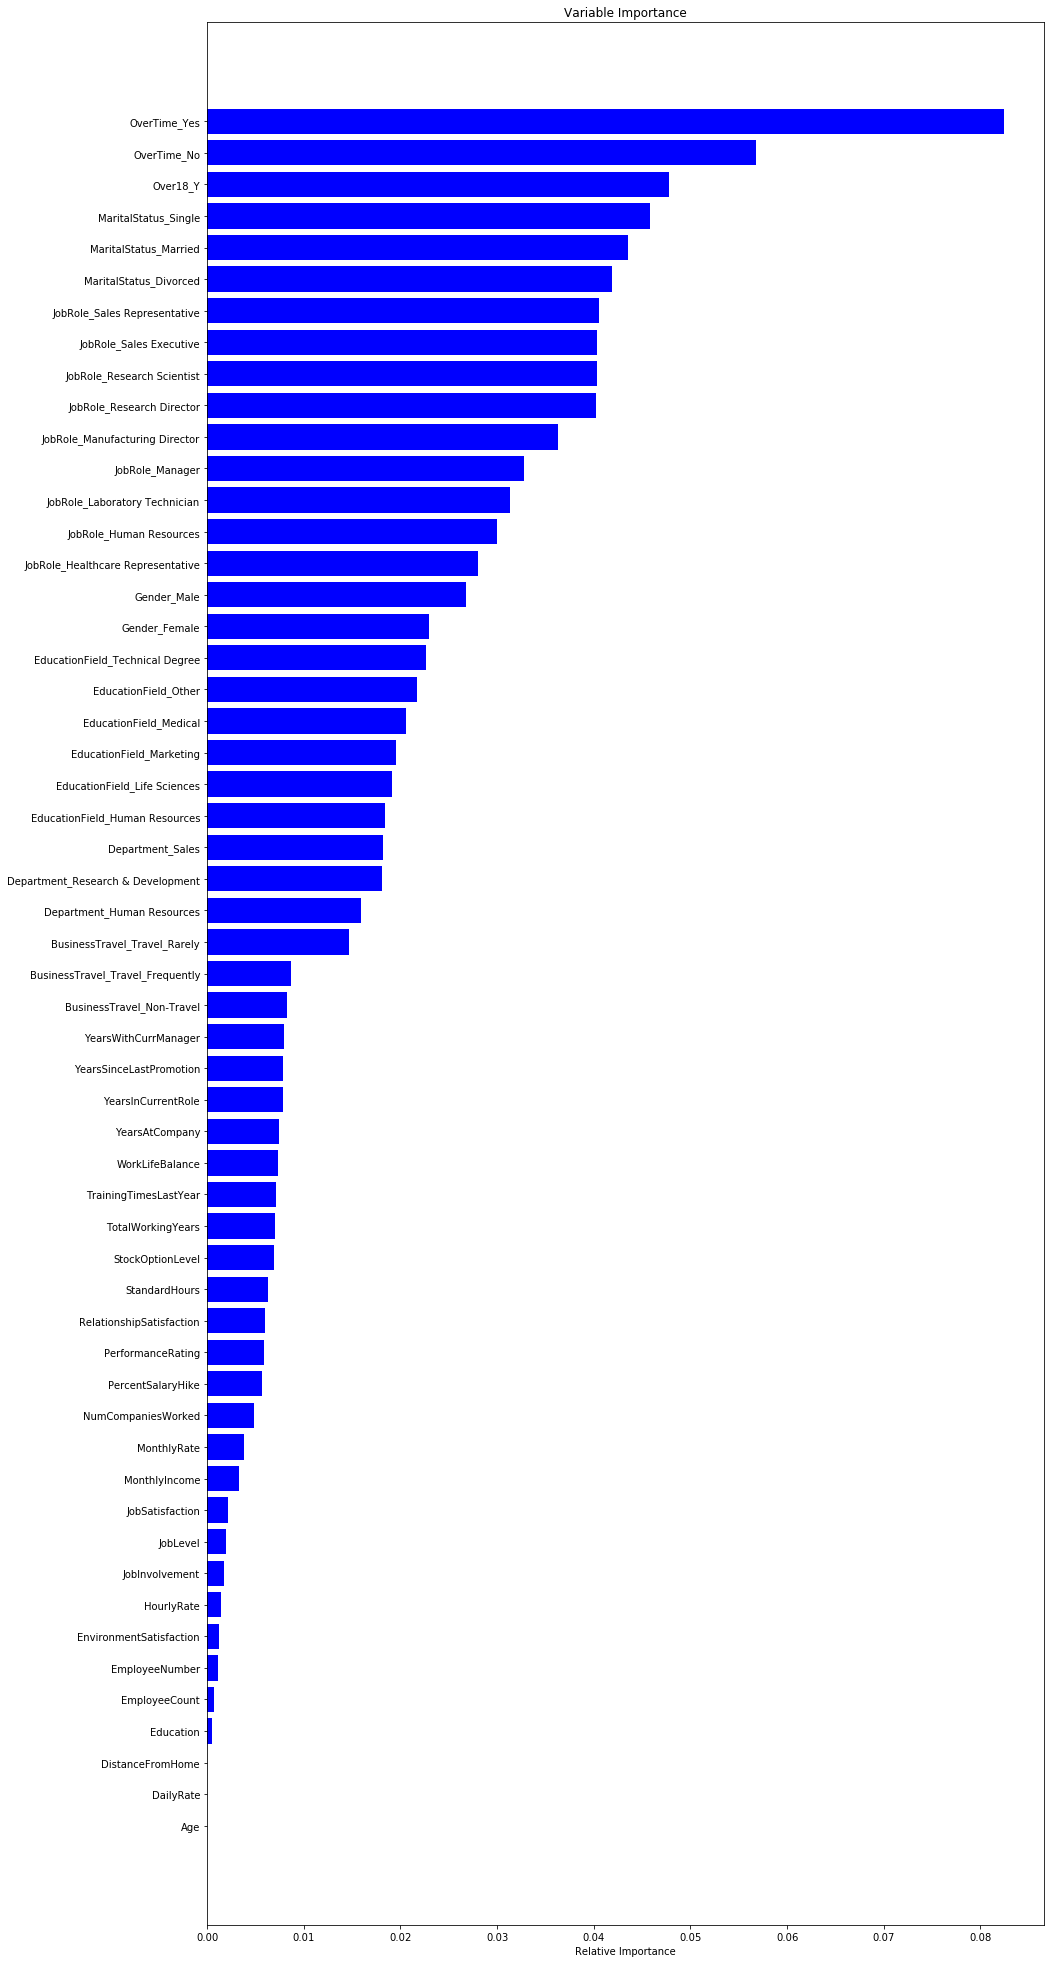

In [17]:
import matplotlib.pyplot as plt
%matplotlib inline

importances = rf.feature_importances_
indices = np.argsort(importances) #We get here the indices that would organize our features by the most important ones 
#to the less important ones

plt.figure(figsize=(15,35))
plt.barh(range(len(indices)), importances[indices], color='b', align='center') #Horizontal bars
plt.yticks(range(len(indices)), features)
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.savefig('c')
plt.show()

**Random Forest is usually used to select the most important features. This allows us then to create a better classifier 
that works on these selected features.** 

# <font color='blue' > Challenge </font>
- You have until Wednesday to create a new classifier that builds on the features identified by Random Forest as important
- Look up ways to optimize and improve your model! 

# <font color='blue' > References: </font>
- ** Stanford University Book:** [An Introduction to Statistical Learning](http://www-bcf.usc.edu/~gareth/ISL/)
- ** Get ready for Nerual Networks: ** [A Neural network using Tensorflow, that got more than 90% accuracy](https://www.kaggle.com/cjansen/90-accuracy-artificial-neural-network-demo)
- ** In depth Analysis using R: ** [Analysis using R](https://www.kaggle.com/damianpanek/attrition-ibm-analysis)

# <font color='blue'> Thank you for your attention. Mouledkom mabrouk! </font>